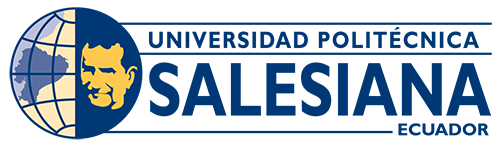

# ANÁLISIS DE DATOS

El análisis de datos es un proceso de inspección, limpieza, transformación y modelado de datos con el objetivo de descubrir información útil, informar conclusiones y respaldar la toma de decisiones. 

El análisis de datos tiene múltiples facetas y enfoques, que abarcan diversas técnicas bajo una variedad de nombres como minería de datos, business intelligence, aprendizaje automático, análisis del bigdata, etc.

El análisis de datos es la piedra angular en diferentes dominios de negocios, ciencias y ciencias sociales.

![EstructuraDataset.png](Imagenes/EstructuraDataset.png)

### Tipo de Variable


**1. Categóricas:** Las variables categóricas tienen valores que describen una «cualidad» o «característica» de una unidad de datos, como «qué tipo» o «qué categoría». Por lo tanto, las variables categóricas son variables cualitativas y tienden a estar representadas por un valor no numérico.

**Nominales:** estas son variables compuestas por dos o más categorías cuyo valor se asigna basado en la identidad del objeto. Algunos ejemplos son sexo, color de ojos o tipo de animal.

**Ordinales:** estas son variables compuestas por dos o más categorías en las que el orden es importante en el valor. Algunos ejemplos son el rango de clases de los estudiantes o las escalas de las encuestas de satisfacción (insatisfecho, neutro, satisfecho).

**2. Numéricas:** Las variables numéricas tienen valores que describen una cantidad medible como un número. Responden a preguntas del tipo «cuánto» o «cuántos». Por lo tanto, las variables numéricas son variables cuantitativas.

**Continuas:** estas son variables que son cuantitativas y pueden medirse a lo largo de una secuencia o un rango de valores. Existen dos tipos de variables continuas; las variables de intervalo puede tener cualquier valor dentro del rango de valores. Algunos ejemplos son temperatura o tiempo. Las variables de relaciones son las variables de intervalo especiales donde un valor de cero (0) significa que no hay ninguna variable. Entre los ejemplos se incluyen ingresos o el volumen de ventas.

**Discretas:** estos tipos de variables continuas son cuantitativos pero tienen un valor específico de un conjunto de valores finito. Los ejemplos incluyen el número de sensores habilitados en una red, o el número de automóviles en un estacionamiento.

![TiposVariables.png](Imagenes/TiposVariables.png)

## 1. Importar Librerías

In [2]:
# importar libreria para cargar y analizar datos del dataset
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
import seaborn as sns

## 2. Cargar Dataset


Numero de Variables (o atributos): 17

**Variables:**

1. DNI (No aporta al análisis)
2. PLAZOMESESCREDITO             (Variable Numérica - Discreta)
3. HISTORIALCREDITO                                                                             (Variable Categórica - Ordinal)
4. PROPOSITOCREDITO                                             (Variable Categórica - Nominal)
5. MONTOCREDITO                  (Variable Numérica - Continua)
6. SALDOCUENTAAHORROS                                                                           (Variable Categórica - Ordinal)
7. TIEMPOEMPLEO                                                                                 (Variable Categórica - Ordinal)
8. TASAPAGO                      (Variable Numérica - Continua)
9. ESTADOCIVILYSEXO                                                                             (Variable Categórica - Ordinal)
10. GARANTE                                                     (Variable Categórica - Nominal)
11. AVALUOVIVIENDA               (Variable Numérica - Continua)
12. ACTIVOS                                                                                     (Variable Categórica - Ordinal)
13. EDAD                         (Variable Numérica - Discreta)
14. VIVIENDA                                                                                    (Variable Categórica - Ordinal)
15. CANTIDADCREDITOSEXISTENTES   (Variable Numérica - Discreta)
16. EMPLEO                                                                                      (Variable Categórica - Ordinal)
17. TRABAJADOREXTRANJERO                                        (Variable Categórica - Nominal)

**Salida:**

TIPOCLIENTE (BUENO:1, MALO:2)                                   (Variable Categórica - Nominal)

In [70]:
import pandas as pd
dataset = "3.DatasetBanco.csv"
#Cargar el dataset en la variable df.
dfOriginal = pd.read_csv(dataset, sep=";")
dataframe=dfOriginal
dataframe.head()

,DNI,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,AVALUOVIVIENDA,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,TRABAJADOREXTRANJERO,TIPOCLIENTE
0,104600001,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A152,2,A173,A201,1
1,104600002,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A152,1,A173,A201,2
2,104600003,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A152,1,A172,A201,1
3,104600004,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A153,1,A173,A201,1
4,104600005,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A153,2,A173,A201,2


In [71]:
salida = dfOriginal.TIPOCLIENTE.values

print(dataframe.shape)
dataframe=dataframe.drop(['DNI'], axis=1)
dataframe=dataframe.drop(['TIPOCLIENTE'], axis=1)
print(dataframe.shape)
dataframe.head()

(1000, 18)
(1000, 16)


,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,AVALUOVIVIENDA,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,TRABAJADOREXTRANJERO
0,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A152,2,A173,A201
1,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A152,1,A173,A201
2,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A152,1,A172,A201
3,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A153,1,A173,A201
4,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A153,2,A173,A201


## 3. Realizar preprocesamiento

**Documentación ColumnTransformer:**
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [72]:
categorical_ordinal = ['HISTORIALCREDITO','SALDOCUENTAAHORROS','TIEMPOEMPLEO','ESTADOCIVILYSEXO','ACTIVOS','VIVIENDA','EMPLEO']
categorical_nominal = ['PROPOSITOCREDITO','GARANTE','TRABAJADOREXTRANJERO']
numerical = ['PLAZOMESESCREDITO','MONTOCREDITO','TASAPAGO','AVALUOVIVIENDA','EDAD','CANTIDADCREDITOSEXISTENTES']
preprocesador1 = make_column_transformer(
    (OrdinalEncoder(),categorical_ordinal),
    (OneHotEncoder(sparse=False),categorical_nominal),
    remainder='passthrough'
    )

X = preprocesador1.fit_transform(dataframe)
print(X.shape[1])
print(X.shape)

print(salida.shape)
#X=np.append(X, salida, axis=1)

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

#print(preprocesador1)

cnamesDataset1 = categorical_ordinal
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_nominal)
cnamesDataset3 = numerical
#print(cnamesDataset2)

cnamesDataset1.extend(cnamesDataset2)
cnamesDataset1.extend(cnamesDataset3)
print(cnamesDataset1)

DataframePreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
DataframePreprocesado = pd.concat([DataframePreprocesado, dfOriginal[['TIPOCLIENTE']]], axis = 1)
DataframePreprocesado.to_csv("4.DatasetBancoPreprocesado.csv", sep=";",index = False) #sep es el separado, por defector es ","
DataframePreprocesado.head()

28
(1000, 28)
(1000,)
['HISTORIALCREDITO', 'SALDOCUENTAAHORROS', 'TIEMPOEMPLEO', 'ESTADOCIVILYSEXO', 'ACTIVOS', 'VIVIENDA', 'EMPLEO', 'PROPOSITOCREDITO_A40', 'PROPOSITOCREDITO_A41', 'PROPOSITOCREDITO_A410', 'PROPOSITOCREDITO_A42', 'PROPOSITOCREDITO_A43', 'PROPOSITOCREDITO_A44', 'PROPOSITOCREDITO_A45', 'PROPOSITOCREDITO_A46', 'PROPOSITOCREDITO_A48', 'PROPOSITOCREDITO_A49', 'GARANTE_A101', 'GARANTE_A102', 'GARANTE_A103', 'TRABAJADOREXTRANJERO_A201', 'TRABAJADOREXTRANJERO_A202', 'PLAZOMESESCREDITO', 'MONTOCREDITO', 'TASAPAGO', 'AVALUOVIVIENDA', 'EDAD', 'CANTIDADCREDITOSEXISTENTES']


,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
0,4.0,4.0,4.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,6.0,1169.0,4.0,4.0,67.0,2.0,1
1,2.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,48.0,5951.0,2.0,2.0,22.0,1.0,2
2,4.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,12.0,2096.0,2.0,3.0,49.0,1.0,1
3,2.0,0.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,42.0,7882.0,2.0,4.0,45.0,1.0,1
4,3.0,0.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,24.0,4870.0,3.0,4.0,53.0,2.0,2


## 4. Realizar Análisis Descriptivo

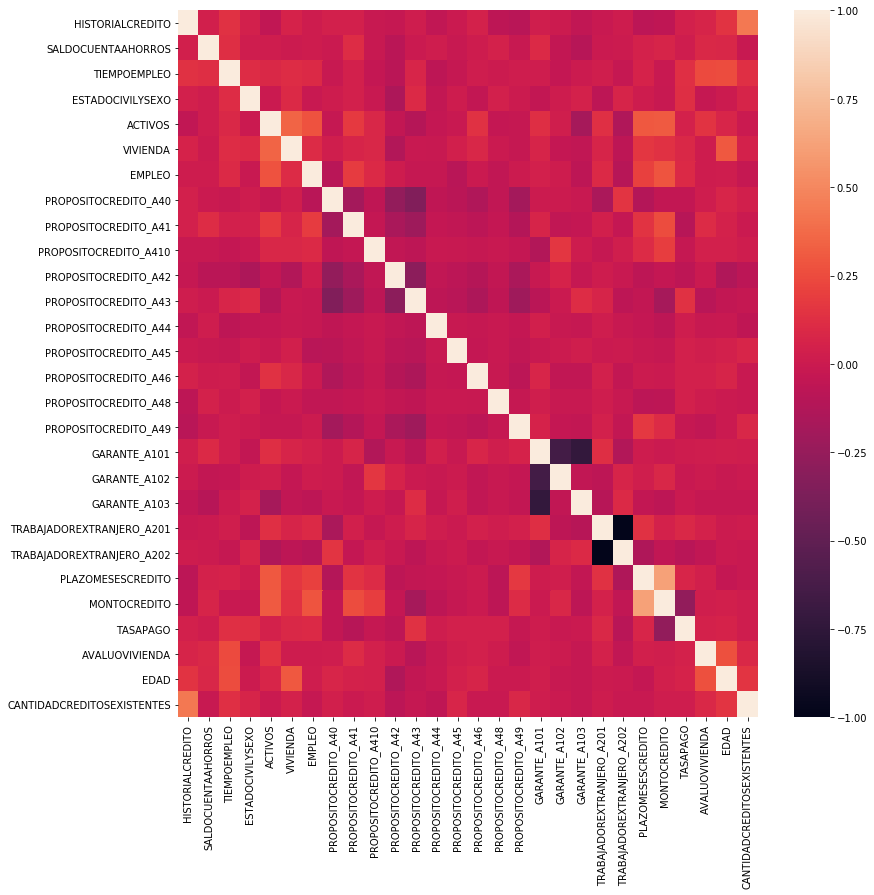

In [87]:
#Análisis de correlaciones entre variables
cr=DataframePreprocesado.corr()
plt.figure(figsize=(13, 13))
ax = sns.heatmap(cr)
plt.savefig('attribute_correlations.png', tight_layout=True)

In [74]:
cr=round(cr,3)
cr

,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
HISTORIALCREDITO,1.000,0.039,0.138,0.042,-0.054,0.062,0.010,0.042,0.039,-0.022,...,-0.047,-0.014,0.014,-0.077,-0.060,0.044,0.063,0.147,0.437,-0.229
SALDOCUENTAAHORROS,0.039,1.000,0.121,0.017,0.019,0.007,0.012,-0.002,0.113,-0.019,...,-0.095,-0.007,0.007,0.048,0.065,0.022,0.091,0.084,-0.022,-0.179
TIEMPOEMPLEO,0.138,0.121,1.000,0.111,0.087,0.111,0.101,-0.021,0.039,-0.035,...,0.008,0.027,-0.027,0.057,-0.008,0.126,0.245,0.256,0.126,-0.116
ESTADOCIVILYSEXO,0.042,0.017,0.111,1.000,-0.007,0.100,-0.012,0.015,0.041,-0.015,...,0.048,-0.066,0.066,0.015,-0.016,0.119,-0.027,0.008,0.065,-0.088
ACTIVOS,-0.054,0.019,0.087,-0.007,1.000,0.345,0.276,-0.024,0.173,0.085,...,-0.179,0.132,-0.132,0.304,0.312,0.053,0.147,0.073,-0.008,0.143
VIVIENDA,0.062,0.007,0.111,0.100,0.345,1.000,0.107,0.025,0.064,0.084,...,-0.054,0.064,-0.064,0.157,0.136,0.089,0.012,0.301,0.049,-0.019
EMPLEO,0.010,0.012,0.101,-0.012,0.276,0.107,1.000,-0.089,0.181,0.101,...,-0.069,0.101,-0.101,0.211,0.285,0.098,0.013,0.016,-0.026,0.033
PROPOSITOCREDITO_A40,0.042,-0.002,-0.021,0.015,-0.024,0.025,-0.089,1.000,-0.187,-0.061,...,-0.012,-0.154,0.154,-0.110,-0.041,-0.046,0.020,0.075,0.036,0.097
PROPOSITOCREDITO_A41,0.039,0.113,0.039,0.041,0.173,0.064,0.181,-0.187,1.000,-0.037,...,-0.035,0.032,-0.032,0.145,0.252,-0.095,0.107,0.051,-0.005,-0.100
PROPOSITOCREDITO_A410,-0.022,-0.019,-0.035,-0.015,0.085,0.084,0.101,-0.061,-0.037,1.000,...,0.016,-0.027,0.027,0.105,0.193,-0.030,0.040,0.042,0.018,0.028


In [75]:
#Análisis descriptivo
DataframePreprocesado.describe() 

,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.54500,1.105000,2.384000,1.68200,1.358000,0.929000,1.904000,0.234000,0.103000,0.01200,...,0.052000,0.963000,0.037000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.300000
std,1.08312,1.580023,1.208306,0.70808,1.050209,0.531264,0.653614,0.423584,0.304111,0.10894,...,0.222138,0.188856,0.188856,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,2.00000,0.000000,2.000000,1.00000,0.000000,1.000000,2.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,2.00000,0.000000,2.000000,2.00000,1.000000,1.000000,2.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,4.00000,2.000000,4.000000,2.00000,2.000000,1.000000,2.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,2.000000
max,4.00000,4.000000,4.000000,3.00000,3.000000,2.000000,3.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


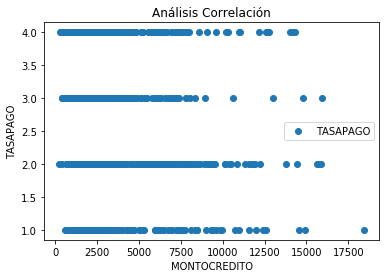

In [91]:
#Visualización para análisis
variableAnálisis='MONTOCREDITO'
variableSalida='TASAPAGO'
DataframePreprocesado.plot(x=variableAnálisis, y=variableSalida, style='o')  
plt.title('Análisis Correlación')  
plt.xlabel(variableAnálisis)  
plt.ylabel(variableSalida)  
plt.show() 

## 5. Realizar Transformación

In [77]:
from sklearn import preprocessing

# Min max scaling
DataframePreprocesado=DataframePreprocesado.drop(['TIPOCLIENTE'], axis=1)
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(DataframePreprocesado)
print("\nDatos normalizados con escala Min Max:\n", data_scaled_minmax)

DataframeTransformado1 = pd.DataFrame(data=data_scaled_minmax,columns=cnamesDataset1)
DataframeTransformado1 = pd.concat([DataframeTransformado1, dfOriginal[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado1.to_csv("5.DatasetBancoTransformadoMinMax.csv", sep=";",index = False) #sep es el separado, por defector es ","
DataframeTransformado1.head()


Datos normalizados con escala Min Max:
 [[1 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 1 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]]


,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
0,1.00,1.0,1.00,0.666667,0.000000,0.5,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,1
1,0.50,0.0,0.50,0.333333,0.000000,0.5,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,2
2,1.00,0.0,0.75,0.666667,0.000000,0.5,0.333333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1
3,0.50,0.0,0.75,0.666667,0.333333,1.0,0.666667,0.0,0.0,0.0,...,1.0,1.0,0.0,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1
4,0.75,0.0,0.50,0.666667,1.000000,1.0,0.666667,1.0,0.0,0.0,...,0.0,1.0,0.0,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,2


In [78]:
# Normalize data
data_normalized_l1 = preprocessing.normalize(DataframePreprocesado, norm='l1')
data_normalized_l2 = preprocessing.normalize(DataframePreprocesado, norm='l2')
print("\nDatos normalizados con L1:\n", data_normalized_l1)
print("\nDatos normalizados con L2:\n", data_normalized_l2)

DataframeTransformado2 = pd.DataFrame(data=data_normalized_l1,columns=cnamesDataset1)
DataframeTransformado2 = pd.concat([DataframeTransformado2, dfOriginal[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado2.to_csv("6.DatasetBancoTransformadoNormL1.csv", sep=";",index = False) #sep es el separado, por defector es ","
DataframeTransformado2.head()

DataframeTransformado3 = pd.DataFrame(data=data_normalized_l2,columns=cnamesDataset1)
DataframeTransformado3 = pd.concat([DataframeTransformado3, dfOriginal[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado3.to_csv("7.DatasetBancoTransformadoNormL2.csv", sep=";",index = False) #sep es el separado, por defector es ","
DataframeTransformado3.head()


Datos normalizados con L1:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Datos normalizados con L2:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
0,0.003416,0.003416,0.003416,0.001708,0.000000,0.000854,0.001708,0.000000,0.0,0.0,...,0.000000,0.000854,0.0,0.005124,0.998314,0.003416,0.003416,0.057217,0.001708,1
1,0.000336,0.000000,0.000336,0.000168,0.000000,0.000168,0.000336,0.000000,0.0,0.0,...,0.000000,0.000168,0.0,0.008066,0.999960,0.000336,0.000336,0.003697,0.000168,2
2,0.001908,0.000000,0.001431,0.000954,0.000000,0.000477,0.000477,0.000000,0.0,0.0,...,0.000000,0.000477,0.0,0.005724,0.999705,0.000954,0.001431,0.023371,0.000477,1
3,0.000254,0.000000,0.000381,0.000254,0.000127,0.000254,0.000254,0.000000,0.0,0.0,...,0.000127,0.000127,0.0,0.005328,0.999969,0.000254,0.000507,0.005709,0.000127,1
4,0.000616,0.000000,0.000411,0.000411,0.000616,0.000411,0.000411,0.000205,0.0,0.0,...,0.000000,0.000205,0.0,0.004928,0.999927,0.000616,0.000821,0.010882,0.000411,2


In [79]:
# Estandarización: media en 0
XEstandarizado = preprocessing.scale(DataframePreprocesado)
print("\nDatos estandarizados:\n", XEstandarizado)

DataframeTransformado4 = pd.DataFrame(data=XEstandarizado,columns=cnamesDataset1)
DataframeTransformado4 = pd.concat([DataframeTransformado4, dfOriginal[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado4.to_csv("8.DatasetBancoTransformadoScale.csv", sep=";",index = False) #sep es el separado, por defector es ","
DataframeTransformado4.head()


Datos estandarizados:
 [[1 2 1 ... 1 3 1]
 [-1 -1 -0 ... -1 -1 -1]
 [1 -1 1 ... 0 1 -1]
 ...
 [-1 -1 1 ... 1 0 -1]
 [-1 -1 -0 ... 1 -1 -1]
 [1 -0 -2 ... 1 -1 -1]]


,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
0,1.344014,1.833169,1.338078,0.449326,-1.293723,0.133710,0.146949,-0.552705,-0.338862,-0.110208,...,-0.234206,0.196014,-0.196014,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,1
1,-0.503428,-0.699707,-0.317959,-0.963650,-1.293723,0.133710,0.146949,-0.552705,-0.338862,-0.110208,...,-0.234206,0.196014,-0.196014,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,2
2,1.344014,-0.699707,0.510060,0.449326,-1.293723,0.133710,-1.383771,-0.552705,-0.338862,-0.110208,...,-0.234206,0.196014,-0.196014,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,1
3,-0.503428,-0.699707,0.510060,0.449326,-0.341055,2.016956,0.146949,-0.552705,-0.338862,-0.110208,...,4.269750,0.196014,-0.196014,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,1
4,0.420293,-0.699707,-0.317959,0.449326,1.564281,2.016956,0.146949,1.809283,-0.338862,-0.110208,...,-0.234206,0.196014,-0.196014,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2


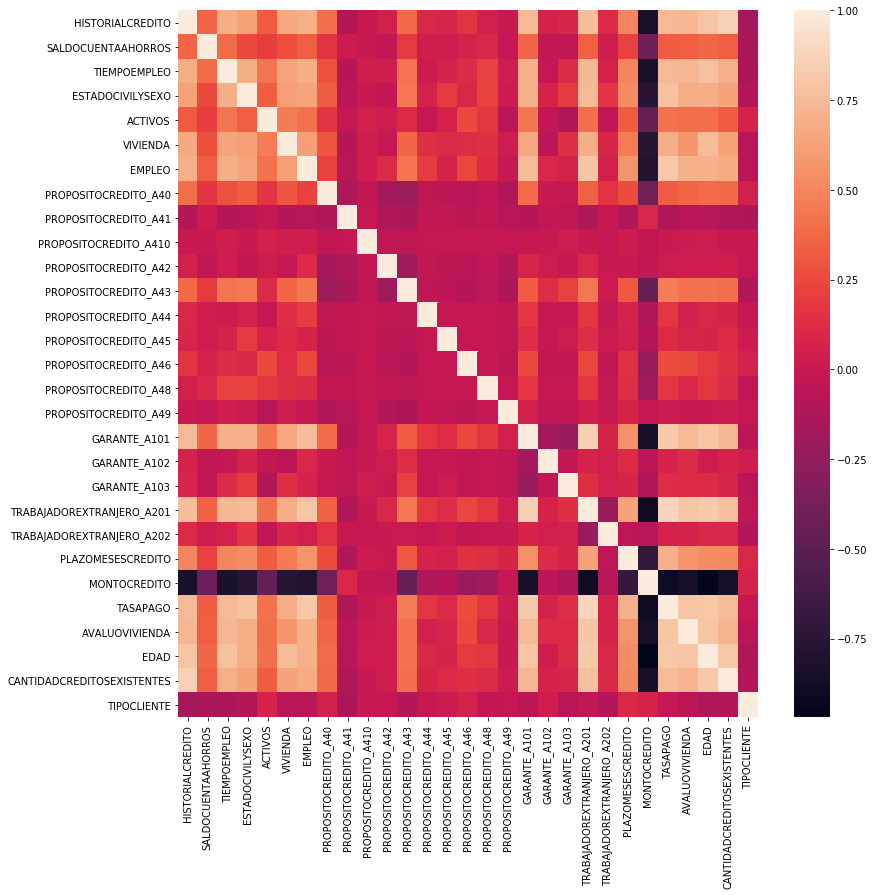

In [88]:
#Análisis de correlaciones entre variables
cr=DataframeTransformado2.corr()
plt.figure(figsize=(13, 13))
ax = sns.heatmap(cr)
plt.savefig('attribute_correlations.png', tight_layout=True)

In [81]:
cr=round(cr,3)
cr

,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
HISTORIALCREDITO,1.000,0.039,0.138,0.042,-0.054,0.062,0.010,0.042,0.039,-0.022,...,-0.047,-0.014,0.014,-0.077,-0.060,0.044,0.063,0.147,0.437,-0.229
SALDOCUENTAAHORROS,0.039,1.000,0.121,0.017,0.019,0.007,0.012,-0.002,0.113,-0.019,...,-0.095,-0.007,0.007,0.048,0.065,0.022,0.091,0.084,-0.022,-0.179
TIEMPOEMPLEO,0.138,0.121,1.000,0.111,0.087,0.111,0.101,-0.021,0.039,-0.035,...,0.008,0.027,-0.027,0.057,-0.008,0.126,0.245,0.256,0.126,-0.116
ESTADOCIVILYSEXO,0.042,0.017,0.111,1.000,-0.007,0.100,-0.012,0.015,0.041,-0.015,...,0.048,-0.066,0.066,0.015,-0.016,0.119,-0.027,0.008,0.065,-0.088
ACTIVOS,-0.054,0.019,0.087,-0.007,1.000,0.345,0.276,-0.024,0.173,0.085,...,-0.179,0.132,-0.132,0.304,0.312,0.053,0.147,0.073,-0.008,0.143
VIVIENDA,0.062,0.007,0.111,0.100,0.345,1.000,0.107,0.025,0.064,0.084,...,-0.054,0.064,-0.064,0.157,0.136,0.089,0.012,0.301,0.049,-0.019
EMPLEO,0.010,0.012,0.101,-0.012,0.276,0.107,1.000,-0.089,0.181,0.101,...,-0.069,0.101,-0.101,0.211,0.285,0.098,0.013,0.016,-0.026,0.033
PROPOSITOCREDITO_A40,0.042,-0.002,-0.021,0.015,-0.024,0.025,-0.089,1.000,-0.187,-0.061,...,-0.012,-0.154,0.154,-0.110,-0.041,-0.046,0.020,0.075,0.036,0.097
PROPOSITOCREDITO_A41,0.039,0.113,0.039,0.041,0.173,0.064,0.181,-0.187,1.000,-0.037,...,-0.035,0.032,-0.032,0.145,0.252,-0.095,0.107,0.051,-0.005,-0.100
PROPOSITOCREDITO_A410,-0.022,-0.019,-0.035,-0.015,0.085,0.084,0.101,-0.061,-0.037,1.000,...,0.016,-0.027,0.027,0.105,0.193,-0.030,0.040,0.042,0.018,0.028


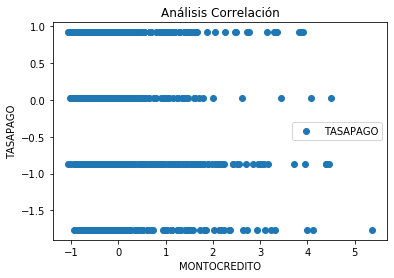

In [92]:
#Visualización para analisis manual
variableAnálisis='MONTOCREDITO'
variableSalida='TASAPAGO'
DataframeTransformado4.plot(x=variableAnálisis, y=variableSalida, style='o')  
plt.title('Análisis Correlación')  
plt.xlabel(variableAnálisis)  
plt.ylabel(variableSalida)  
plt.show() 